In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.random.seed(12345)
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
plt.rcParams["font.family"] = 'Malgun Gothic'


# 빅데이터 분석에 필요한 pandas의 데이터프레임의 반드시 알아야하는 핵심 기능(7,8,9,10장)
    * 데이터프레임 생성: pd.DataFrame() 함수를 사용하여 데이터프레임을 생성할 수 있다. 
    * 데이터프레임 인덱싱: loc 및 iloc 인덱서를 사용하여 데이터프레임의 특정 행과 열을 선택할 수 있다.
    * 데이터프레임 슬라이싱: 슬라이싱 연산자[start:end:step]를 사용하여 데이터프레임의 부분을 선택할 수 있다.
    * 데이터프레임 필터링: 불리언 마스크(조건식)를 사용하여 데이터프레임의 행과 열을 필터링할 수 있다. // 중간 이전
    // 중간 이
    * 데이터프레임 정렬: sort_values() / sort_index() 메서드를 사용하여 데이터프레임을 열 또는 인덱스별로 정렬할 수 있다.
    * 데이터프레임 집계: groupby() / agg() / apply() 메서드를 사용하여 데이터프레임을 그룹화하고 집계 연산을 수행할 수 있다.
    * 데이터프레임 결측치/중복 처리: dropna() / drop_duplicates() / fillna() 메서드를 사용하여 데이터프레임의 결측치를 채울 수 있다.
    * 데이터프레임 결합: merge() 또는 concat() 메서드를 사용하여 여러 데이터프레임을 결합할 수 있다.


## # 7장 데이터 정제 및 준비(Data Cleaning and Preparation)
* 7.1 누락된 데이터 처리하기
  * np.nan
  * None
  * isna() : 결측치에 대해 True 값으로 반환
  * dropna() : 결측치 제거하기
  * fillna() :결측값을 다른 값으로 채우는 데 사용


In [36]:
# ex : 다음 주어진 결측치을 담고 있는 데이터프레임에 대해 정제 작업하기

data = np.random.standard_normal((7,3)) # 데이터를 랜덤하게 만들어주는 메소드 (행의 크기, 열의 크기) -> 21개의 랜덤 데이터
df = pd.DataFrame(data)

df.iloc[:4, 1] = np.nan # 0~3개의 결측치를 np.nan에 추가 / iloc[:4, 1] 에서 :4는 원하는 열의 갯수보다 +1, 1은 원하느 행의 값 그대로
df.iloc[:2, 2] = np.nan
df


# #1. 결측치 확인 및 처리
df.isna() # 데이터값이 있으면 False 없으면 True로 출력

# 1-1 결측치 제거 
filtered = df.dropna() # 결측치(True)를 포함한 행을 제거
filtered

# #2. 색인 재설정
filtered.reset_index(drop=True) #색인(index)값을 다시 0부터 재설정 / (drop = True)를 안해주면 원래 인덱스값까지 포함되어서 출력

# #3. 결측치를 평균값으로 채우기
#3-1 데이터셋의 대표값 : 평균, 중앙값, 최대값, 최소
# df.mean() # 각 컬럼별 데이터 평균값 -> 모든 행에대한 열의 값들의 평균을 출력하고 행의 크기를 index 값으로 출력
df.fillna(df.mean()) #NaN의 위치에 평균값을 넣어

,0,1,2
0,0.862284,0.604536,0.386509
1,-0.962791,0.604536,0.386509
2,-0.479120,0.604536,0.745974
3,-0.622547,0.604536,0.750018
4,-0.056715,2.300675,0.569497
5,1.489410,1.264250,-0.761837
6,-0.331617,-1.751315,0.628894


7.2 Transformation
* duplicated()
  * 데이터프레임의 중복된 행 또는 값은 True로 표시되고, 중복되지 않은 행 또는 값은 False로 표시    
* drop_duplicates()
  * 데이터프레임의 모든 열을 고려하여 중복된 행 또는 값을 제거
    * subset: 중복된 행 또는 값을 제거하는 데 사용할 열의 리스트
    * keep: 다음 값 중 하나.
      * first: 첫 번째 중복된 행 또는 값을 유지.
      * last: 마지막 중복된 행 또는 값을 유지
      * False: 모든 중복된 행 또는 값을 제거.
      * inplace: DataFrame을 변경할지 여부를 표시.

In [42]:
# ex 데이터프레임의 중복 데이터 제거하기 
# dataFrame with duplicated values : 범주형 데이터(object), 수치 데이터 (int 64, float64)
data = {"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 5, 5]}
data = pd.DataFrame(data)
print(data)

#1. 중복된 데이터 확인 (data 값에서는 마지막 k1 = two, k2 = 5값이 2개이기에 마지막 two의 5에 True값을 넣어서 중복확인)
data.duplicated()
print(data.duplicated())

#2. 중복된 행 제거하기 -> 위의 True값을 제거
data.drop_duplicates(keep = "first") #괄호 안에 값을 없애면 first가 기본으로 되어있고, first를 last로 바꾸면 마지막 중복값을 남기게 된다. 
#위의 괄호안에는 (subset = ["원하는 열의 index", "원하는 열의 index"], keep="남기길 원하는 값의 위치")로 표현할 수 있다.

#3. "K1" 열을 기준으로 중복된 행을 필터링하기 ->k1의 값에서 처음 선언된 값을 제외한 중복된 값들을 제거
data.drop_duplicates(subset=['k1'], keep="last")

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   5
6  two   5
0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool


,k1,k2
4,one,3
6,two,5


## 문제: 주어진 데이터셋를 정제하고 준비하여 다음 데이터 분석을 수행하시오.
* 데이터셋:


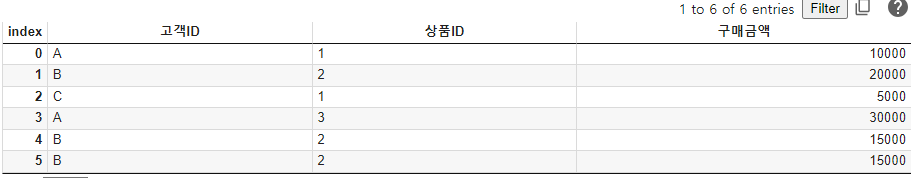
  * 고객별 구매 금액 합계
  * 상품별 구매 금액 합계
  * 고객별로 가장 많이 구매한 상품

In [55]:
# 데이터셋
data1 = [
  {"customer_id": "A", "product_id": "1", "amount": 10000},
  {"customer_id": "B", "product_id": "2", "amount": 20000},
  {"customer_id": "C", "product_id": "1", "amount": 5000},
  {"customer_id": "A", "product_id": "3", "amount": 30000},
  {"customer_id": "B", "product_id": "2", "amount": 15000},
  {"customer_id": "B", "product_id": "2", "amount": 15000}
]

In [56]:
# 데이터프레임 탐색하기
# 1) 주어진 데이터셋을 데이터프레임으로 변환하기

df1 = pd.DataFrame(data1)

# 2) 데이터프레임을 첫 행부터 3번째 행까지 슬라이싱하기

df1.head(3)
# df1.iloc[:3]

# 3)데이터프레임의 열 레이블 변경하기
df1.rename(columns={"customer_id":"고객ID","product_id":"상품ID","amount":"구매금액"}, inplace=True)
df1

,고객ID,상품ID,구매금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000
5,B,2,15000


In [57]:
# 데이터프레임 정제하기
# 1) 결측치 데이터 확인하기
df1.isna()

# 2) 중복 데이터 확인하기
# df.duplicated(subset=["customer_id":"고객ID","product_id":"상품ID","amount":"구매금액"], keep="first") 원본
df1.duplicated()

# 3) 중복 데이터 제거
df1.drop_duplicates()

,고객ID,상품ID,구매금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000


In [58]:
# 데이터프레임 정렬하기
# 1) 고객ID 와 상품ID의 값을 기준으로 데이터프레임의 행을 내림차순으로 정렬하기

df1 = df1.sort_values(by = ["고객ID"],ascending=True)
df1

# 2) 데이터프레임의 기존의 인덱스을 변경 또는 재설정하기

df1 = df1.reset_index(drop = True)
df1

,고객ID,상품ID,구매금액
0,A,1,10000
1,A,3,30000
2,B,2,20000
3,B,2,15000
4,B,2,15000
5,C,1,5000


In [62]:
# 데이터분석하기
# 1) 고객별 구매 금액 합계를 계산하기
result = df1.groupby(['고객ID'])['구매금액'].sum()
print(result)

고객ID
A    40000
B    50000
C     5000
Name: 구매금액, dtype: int64


In [63]:
# 2) 상품별 구매 금액 합계를 계산하기
result = df1.groupby(['상품ID'])['구매금액'].sum()
print(result)

상품ID
1    15000
2    50000
3    30000
Name: 구매금액, dtype: int64


In [68]:
# 3) 상위 최우수 고객 2명 필터링하기
result = df1.groupby("고객ID")["구매금액"].sum().sort_values(ascending=False)
print(result.head(2))
print(result.idxmax())

고객ID
B    50000
A    40000
Name: 구매금액, dtype: int64
B


In [70]:
# 4) 고객에서 가장 인기있는 상품 찾기
df1["상품ID"].value_counts()

상품ID
2    3
1    2
3    1
Name: count, dtype: int64

고객ID
A    20000.0
B    16667.0
C     5000.0
Name: 구매금액, dtype: float64


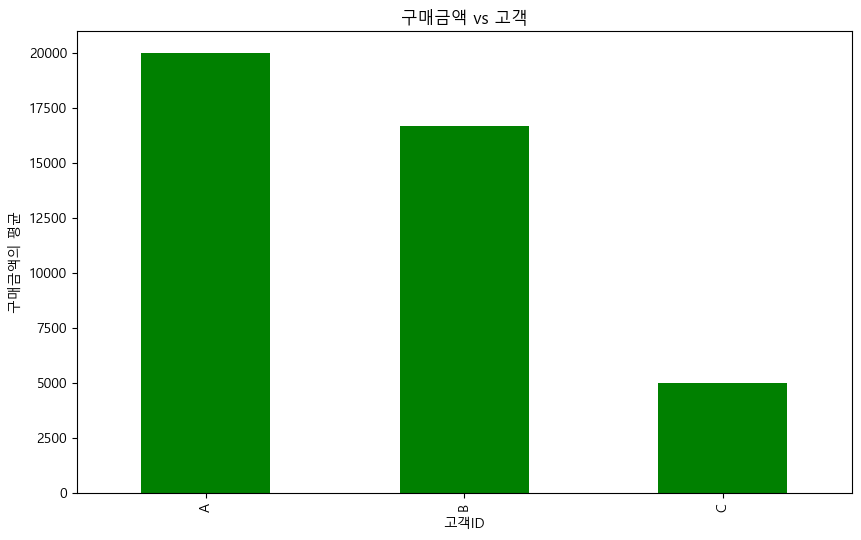

In [89]:
# 5) 고객ID별 구매금액의 평균를 계산하고 시각화하기
result = round(df1.groupby(['고객ID'])['구매금액'].mean())
print(result)

# result.plot.bar(color = 'gray')
result.plot(kind = "bar", color = "green") # line(선그래프)
plt.title("구매금액 vs 고객")
plt.ylabel("구매금액의 평균")
plt.show()

고객ID  상품ID
A     1       10000
      3       30000
B     2       50000
C     1        5000
Name: 구매금액, dtype: int64


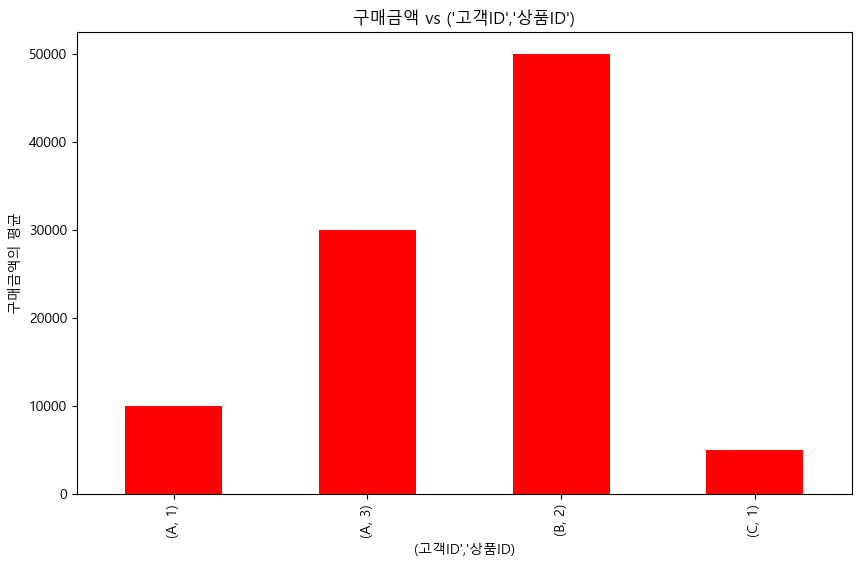

In [92]:
# 6) 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 합계를 계산하고 시각화하기
result = df1.groupby(['고객ID','상품ID'])['구매금액'].sum()
print(result)

# result.plot.bar(color = 'gray')
result.plot(kind = "bar", color = "red") # line(선그래프)
plt.title("구매금액 vs ('고객ID','상품ID')")
plt.ylabel("구매금액의 평균")
plt.xlabel("(고객ID','상품ID)")
plt.show()

# 8장 다중색인(mutiIndex)
* 다중색인(multi-index)은 데이터프레임이나 시리즈의 인덱스를 여러 열로 구성하는 것
* 다중색인 사용
  * 데이터를 여러 기준으로 그룹화
  * 데이터를 여러 기준으로 검색


In [112]:
# case1>
# 1. 다중색인 생성

# 1) 데이터프레임 생성
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
# print(df.index,'\n\n',df)


# # 2) 다중 색인으로 사용할 튜플 리스트
index = [('X', 1), ('X', 2), ('Y', 1)]

# # # 3) 다중색인 설정
multi_index = pd.MultiIndex.from_tuples(index)

# # print(multi_index)

# # 4)주어진 단일 데이터프레임에 다중 인덱스 적용
df.index =  multi_index
# print(df)

# #2.다중색인 사용
# #1) 데이터프레임을 계층적 색인의 첫 번째 인덱스 레벨을 기준으로 그룹화하기
grouped = df.groupby(level = 0)
# print(grouped)

# # 2)각 그룹에 대한 정보 출력하기
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()

Group: X
     A  B
X 1  1  4
  2  2  5

Group: Y
     A  B
Y 1  3  6



In [113]:
# case2> 
import pandas as pd

# 다중 인덱스를 가진 데이터프레임 생성
arrays = [['A', 'A', 'B', 'B'], [1, 2, 1, 2]]
index = pd.MultiIndex.from_arrays(arrays, names=('first', 'second'))
df = pd.DataFrame({'data': [1, 2, 3, 4]}, index=index)
df
# 첫 번째 인덱스 수준을 기준으로 그룹화
grouped = df.groupby(level=0)

# 각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


Group: A
              data
first second      
A     1          1
      2          2

Group: B
              data
first second      
B     1          3
      2          4



In [114]:
# case3>
# 1. 다중 색인 생성
df = pd.DataFrame({
    "data": [1, 2, 3, 4],
    "index1": ["A", "A", "B", "B"],
    "index2": [1, 2, 1, 2],
})
# print(df,"\n\n")

# 다중 색인을 가진 데이터프레임 만들기
df = df.set_index(["index1", "index2"])
# print(df,"\n\n")

# 2.다중 색인 사용
# 1)각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


Group: A
              data
first second      
A     1          1
      2          2

Group: B
              data
first second      
B     1          3
      2          4



In [128]:
# 2) 데이터셋 슬라이싱 :
print(df)
print()

print('1번--------\n',df.loc["A", 1],'\n\n') # 레벨 0에서 "A" 선택, 레벨 1에서 1 선택

print('2번--------\n',df.loc["B", :],'\n\n') # 레벨 0에서 "B" 선택, 레벨 1에서 모든 값 선택
df.loc[[('A', 1),('B',1)]] # 레벨 0에서 "A"와 "B" 선택, 레벨 2에서 1 선택

               data
index1 index2      
A      1          1
       2          2
B      1          3
       2          4

1번--------
 data    1
Name: (A, 1), dtype: int64 


2번--------
         data
index2      
1          3
2          4 




,,data
index1,index2,
A,1,1
B,1,3


### [문제]: 다음 DataFrame에서 고객ID와 상품ID를 기준으로 다중색인을 만들고, 각 그룹의 구매금액의 합계를 계산하세요.

In [132]:
# 데이터셋
data = [
  {"고객ID": "A", "상품ID": "1", "구매금액": 10000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 20000},
  {"고객ID": "C", "상품ID": "1", "구매금액": 5000},
  {"고객ID": "A", "상품ID": "3", "구매금액": 30000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000}
]

# 1. 데이터프레임 생성
df = pd.DataFrame(data)
print(df)
# 2. 고객ID와 상품ID을 기준으로 다중색인을 생성하여 데이터프레임 생성하기
df = df.set_index(["고객ID","상품ID"])
print(df)
#3. 데이터프레임의 다중색인을 출력하기

df.index

  고객ID 상품ID   구매금액
0    A    1  10000
1    B    2  20000
2    C    1   5000
3    A    3  30000
4    B    2  15000
5    B    2  15000
            구매금액
고객ID 상품ID       
A    1     10000
B    2     20000
C    1      5000
A    3     30000
B    2     15000
     2     15000


MultiIndex([('A', '1'),
            ('B', '2'),
            ('C', '1'),
            ('A', '3'),
            ('B', '2'),
            ('B', '2')],
           names=['고객ID', '상품ID'])

In [ ]:
# 4. 고객을 기준으로 묶어서 구매금액의 합을 계산하시오.


# 5. 상품을 기준으로 묶어서 구매금액의 합을 계산하시오.

# 6. 결과를 출력하시오.


# 9.2장. plotting with pandas, matplolib and seaborn


* Bar (막대그래프)
    * 막대그래프는 범주형 데이터의 빈도, 비율 또는 백분율을 시각화하는 데 효과적:
      * 빈도 분포 표시 : 범주별 빈도를 시각적으로 비교할 수 있다.
          * ex> 각각의 막대가 특정 항목의 빈도를 나타내며, 막대의 높이는 해당 항목의 빈도에 비례
      * 비율 또는 백분율 표시: 범주별로 전체의 비율 또는 백분율을 표시
          * 이것은 각 범주의 중요성이나 상대적 크기를 비교하는데 도움.
      * 시계열 데이터 표시: 시간에 따른 변화를 보여줄 때 유용
          * 각 시점 또는 기간에 대한 데이터를 각각의 막대로 나타낼 수 있다.
      * 다중 변수의 비교: 여러 범주에 대한 여러 그룹간의 비교를 수행 사용.
          * 이를 통해 각 그룹간의 차이를 직관적으로 이해할 수 있다.


              A         B         C         D
one    0.824168  0.128785  0.171944  0.174912
two    0.381941  0.101593  0.389797  0.809914
three  0.353752  0.876518  0.958832  0.838728
four   0.115045  0.562412  0.108438  0.875868
five   0.350008  0.897715  0.124177  0.637862
six    0.872525  0.001066  0.304720  0.028825


<Axes: >

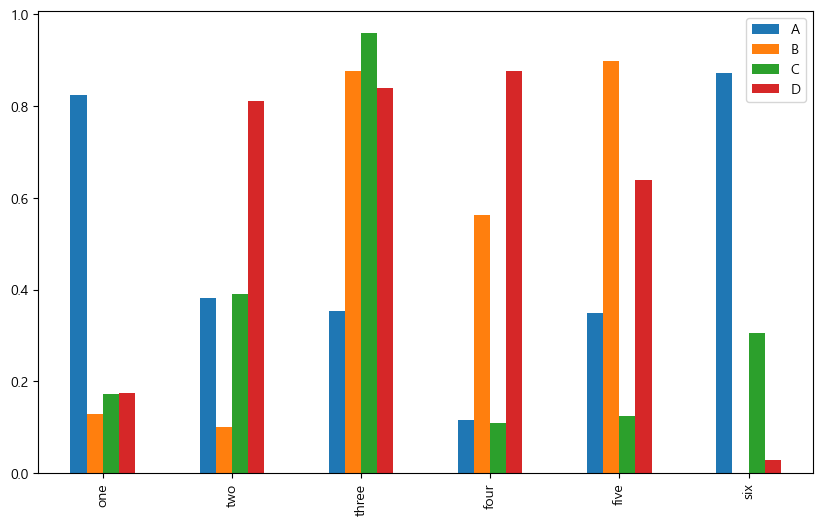

In [143]:
# ex > bar plot 사용법
#1. DataSet 준비 
data = np.random.uniform(size=(6,4)) #random함수를 사용해 6개의 행과 4개의열 총 24개의 데이터를 뽑아냄
                  
df = pd.DataFrame(data,
                  index = ["one", "two", "three", "four", "five", "six"],
                  columns = ["A","B", "C", "D"])
print(df)

df.plot.bar()

## [예제]
* 'examples/tips.csv'을 로딩하여 'day'별에 따라 'size' 인원별 팁의 백분율을 보여주는 쌓인 막대 그래프를 그리기

     total_bill   tip smoker   day    time  size
0         16.99  1.01     No   Sun  Dinner     2
1         10.34  1.66     No   Sun  Dinner     3
2         21.01  3.50     No   Sun  Dinner     3
3         23.68  3.31     No   Sun  Dinner     2
4         24.59  3.61     No   Sun  Dinner     4
..          ...   ...    ...   ...     ...   ...
239       29.03  5.92     No   Sat  Dinner     3
240       27.18  2.00    Yes   Sat  Dinner     2
241       22.67  2.00    Yes   Sat  Dinner     2
242       17.82  1.75     No   Sat  Dinner     2
243       18.78  3.00     No  Thur  Dinner     2

[244 rows x 6 columns]


<Axes: xlabel='day', ylabel='day'>

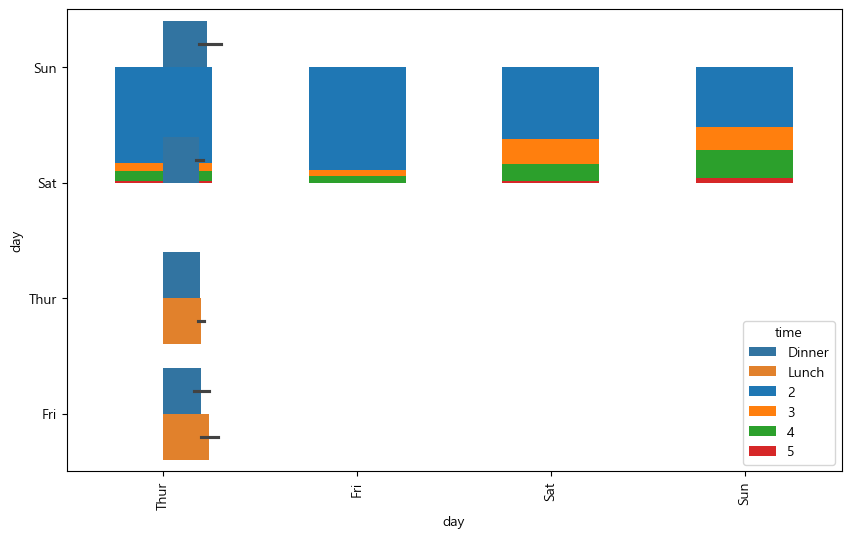

In [160]:
# 1. Load a dataset
tips = pd.read_csv('examples/tips.csv')
print(tips)
# 2. 빈도수 표 만들기
party_counts = pd.crosstab(tips["day"], tips['size'])
# print(party_counts,'\n')

# #3. 인덱스 재설정
party_counts = party_counts.reindex(index = ["Thur","Fri","Sat","Sun"])
# print(party_counts,'\n')


# ## 3. 필터링 - 불필요한 데이터 삭제
party_counts = party_counts.loc[:,2:5]
# print(party_counts,'\n')

# # 4. 데이터 정규화 작업 : 데이터 -> 비율로 계산 / 0~1 사이의 값으로 변
party_pcts = party_counts.div(party_counts.sum(axis = "columns"),
                              axis = "index")
# print(party_pcts,'\n')

# # 5. 막대그래프로 그리기
party_pcts.plot.bar(stacked=True) # stacked = True를 없애주면 합쳐지지 않고 따로 나온다.

# # 6. 팁의 배분율 열 추가하기
tips["tip_pct"] = tips['tip'] / (tips['total_bill'] - tips['tip'])
sns.barplot(x = "tip_pct", y='day', data=tips, orient='h', hue='time') #sns는 맨위에 import 시켜준거 확인하면 됨 / x = 팁의 비율, y = 

## [문제] 다음 주어진 데이터셋에서 다음 작업을 수행하시오.
  * 나이가 30세 이상인 사람들의 이름을 출력하기
  * 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기
  * 이름이 'Bob'인 사람의 도시를 출력하기

In [ ]:
# dataset
data = {
    'Name': ['John', 'Mary', 'Bob', 'Alice', 'Tom'],
    'Age': [20, 25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Dallas']
}

In [ ]:
# 1. 나이가 30세 이상인 사람들의 이름 출력하기



In [ ]:
# 2. 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기



In [ ]:
# 3. 이름이 'Bob'인 사람의 도시를 출력하기



# 10장 데이터 집계와 그룹 연산
* 하나 이상의 키(데이터프레임의 열 이름)를 이용해서 판다스 객체를 여러 조각으로 나누는 방법
* 합계, 평균, 표준편차, 사용자 정의 함수 같은 그룹 요약 통계를 계산하는 방법
* 정규화, 선형 회귀, 순위 또는 부분집합 선택 같은 그룹 내 변형이나 다른 조작을 적용하는 방법




* groupby() 연산에 대한 원리
    * 분리-적용-결합(split-apply-combine)
    * Aggregations refer to any data transformation that produces scalar values from arrays.
        * agg() / 집계하다 , apply() 

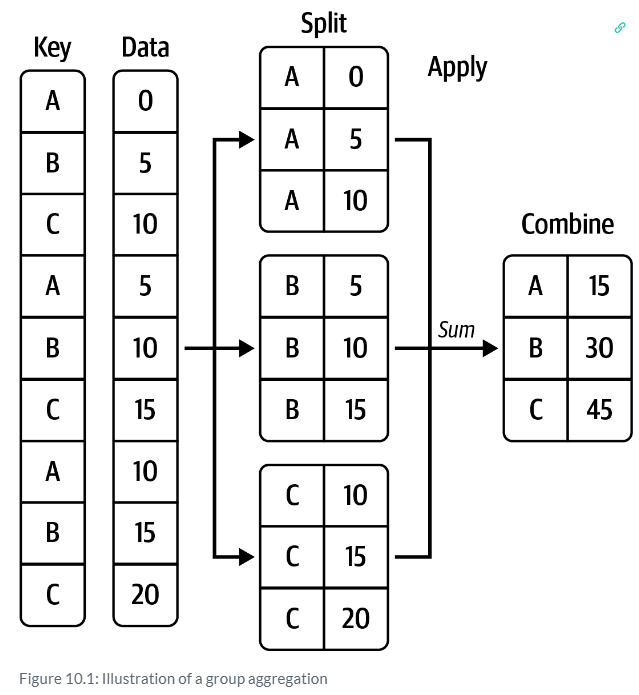

### [예제] 주어진 데이터를 key1으로 묶고 각 그룹에서 data1의 평균을 구하기

In [5]:
# 데이터셋
dataset = {"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)}
df = pd.DataFrame(dataset)
print(df,'\n\n')
df.index

   key1  key2     data1     data2
0     a     1 -1.541996  1.349742
1     a     2 -0.970736  0.069877
2  None     1 -1.307030  0.246674
3     b     2  0.286350 -0.011862
4     b     1  0.377984  1.004812
5     a  <NA> -0.753887  1.327195
6  None     1  0.331286 -0.919262 




RangeIndex(start=0, stop=7, step=1)

* groupby()
    * df.groupby(["컬럼명1","컬럼명2"]).sum() /[] 내부 왼쪽컬럼 먼저 작성 / .sum,mean등 작성

In [21]:
# mean() - 주어진 데이터을 컬럼을 사용하여 각 그룹으로 묶어 평균 집계 
## 그룹 색인에서 누락된 값은 기본적으로 결과에서 제외됨
print(df,'\n')

# result = df.groupby("key1").mean() # 생성되어지는 데이터프레임의 색인 - 'key1' /  데이터의 평균값
# result = df.groupby("key1").size() # 각 급룹에 속하는 데이터 갯수
# result = df.groupby("key1").count() # 총 컬럼별 각 그룹에 속하는 데이터 갯수
# result = df.groupby("key1").sum() # 총 컬럼별 각 그룹에 속하는 데이터의 합
# print(result,'\n')

# result = df.groupby("key2").mean(numeric_only=True) # key1열이 결과에서 빠짐: df['key1']은 숫자 데이터가 아님
# print(result)

# result = df.groupby(["key1", "key2"]).sum() # 다중색인 데이터프레임(multiindex["key1","kwy2"])
# print(result)
# result.index

# # 특히 대용량 데이터셋을 다룰 때 소수의 열(data2)만 집계(평균)하기
result = df.groupby(["key1", "key2"])[["data2"]].mean()
print(result)

   key1  key2     data1     data2
0     a     1 -1.541996  1.349742
1     a     2 -0.970736  0.069877
2  None     1 -1.307030  0.246674
3     b     2  0.286350 -0.011862
4     b     1  0.377984  1.004812
5     a  <NA> -0.753887  1.327195
6  None     1  0.331286 -0.919262 

              data2
key1 key2          
a    1     1.349742
     2     0.069877
b    1     1.004812
     2    -0.011862


## 예제: 10.2.1 열에 여러 가지 함수 적용하기
* Column-Wise and Multiple Function Application


* agg()
  * df.groupby()[컬럼 리스트].agg([집계함수 리스트])
  * 데이터프레임의 모든 열을 집계하려면 mean이나 std같은 메서드를 호출하거나 agg를 통해 원하는 함수를 사용
  * 열에 따라 다른 함수를 사용해서 집계를 수행하거나 여러 개의 함수를 한 번에 적용하기

In [22]:
# 데이터셋 가져오기
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [23]:
# total_bill에서 팁의 비율을 tip_pct 열에 출가하기
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [29]:
# ex1
# grouped = tips.groupby(["day", "smoker"])
# grouped_pct = grouped["tip_pct"]
# grouped_pct.mean()
# result = grouped_pct.agg("mean") # 기술 통계에서는 함수 이름을 문자열로 넘기기
# print(result)

result = tips.groupby(["day","smoker"])["tip_pct"].agg(["mean"])
print(result)

                 mean
day  smoker          
Fri  No      0.151650
     Yes     0.174783
Sat  No      0.158048
     Yes     0.147906
Sun  No      0.160113
     Yes     0.187250
Thur No      0.160298
     Yes     0.163863


In [31]:
# ex2
def diff(arr):
    return arr.max() - arr.min()

result = tips.groupby(["day","smoker"])["tip_pct"].agg([diff, "mean","std"])
print(result)

                 diff      mean       std
day  smoker                              
Fri  No      0.067349  0.151650  0.028123
     Yes     0.159925  0.174783  0.051293
Sat  No      0.235193  0.158048  0.039767
     Yes     0.290095  0.147906  0.061375
Sun  No      0.193226  0.160113  0.042347
     Yes     0.644685  0.187250  0.154134
Thur No      0.193350  0.160298  0.038774
     Yes     0.151240  0.163863  0.039389


In [37]:
# ex3 데이터프레임은 열마다 다른 함수를 적용하거나 여러 개의 함수를 모든 열에 적용하기
functions = ["count", "mean", "max"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)  # 데이터프레임은 계층적인 열로 구성
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

## # 10.2.2 색인되지 않은 형태로 집계된 데이터 반환하기
* 집계된 데이터는 유일한 그룹 키 조합으로 (어떤 경우에는 계층적 색인)되어 반환되었다.
* groupby메서드에 as_index=False를 넘겨서 색인 작업을 비활성화

In [38]:
grouped = tips.groupby(["day", "smoker"], as_index=False)
grouped.mean(numeric_only=True)

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## # 10.3 apply 메서드 : 일반적인 분리-적용-병합
* apply() 메서드는 groupby 메서드의 가장 일반적인 메서드
* apply 메서드는 객체를 여러 조각으로 나누고, 전달된 함수를 각 조각에 일괄적으로 적용한 후 이를 다시 합친다.
* df.groupby().

In [40]:
# 특정 열에서 가장 큰 값을 갖는 행을 선택하는 함수 정의
def top(df, n=5, column="tip_pct"): #df에서 tip_pct를 기준으로 n의 값만큼 실행한다.
    return df.sort_values(column, ascending=False)[:n]
top(tips, n=6) # 다른 숫자를 출력하고 싶을 경우에는 n=i값으로 변경 i값에 원하는 값을 입력

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


In [42]:
result = tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")
print(result)

                 total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982


C:\Users\heedl\AppData\Local\Temp\ipykernel_6796\1563265740.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")


In [43]:
result = tips.groupby("smoker")["tip_pct"].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [44]:
result.unstack("smoker")


       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

## [문제] 
* 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 평균을 계산하고, 그 결과를 상품ID순으로 출력하세요.

고객ID  상품ID
1     101     10000.0
3     101     40000.0
2     102     20000.0
3     102     60000.0
1     103     30000.0
2     103     50000.0
Name: 구매금액, dtype: float64


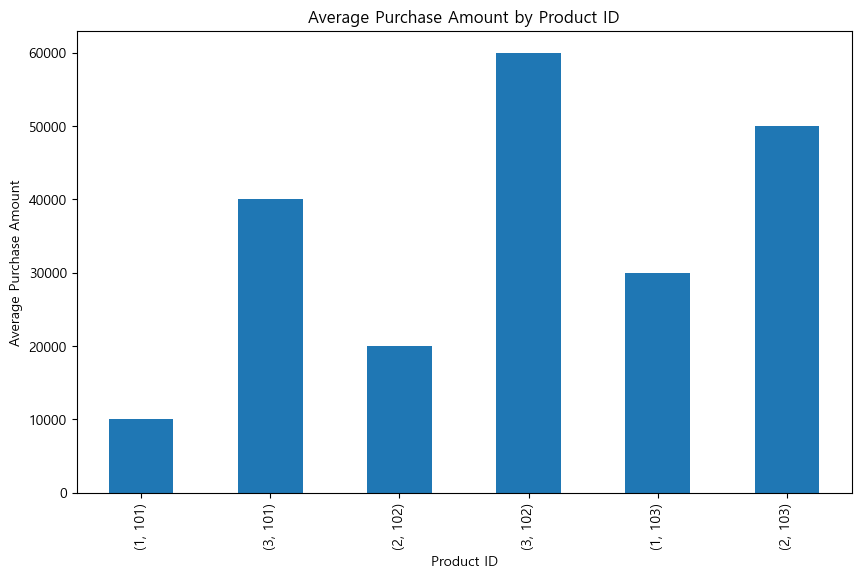

In [45]:
df = pd.DataFrame({
    "고객ID": [1, 2, 1, 3, 2, 3],
    "상품ID": [101, 102, 103, 101, 103, 102],
    "구매금액": [10000, 20000, 30000, 40000, 50000, 60000]
})

# 고객ID와 상품ID을 기준으로 그룹화하여 구매금액의 평균을 계산
average_spent_by_customer_product = df.groupby(["고객ID", "상품ID"])["구매금액"].mean()

# 상품ID을 기준으로 정렬하기
average_spent_by_customer_product = average_spent_by_customer_product.sort_index(level = "상품ID")
print(average_spent_by_customer_product)

# 막대그래프로 시각화하기
average_spent_by_customer_product.plot.bar()


# 그래프 부가 정보 추가하기
plt.title("Average Purchase Amount by Product ID")
plt.xlabel("Product ID")
plt.ylabel("Average Purchase Amount")
plt.show()